## Импорты

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

Реализация кастомного GradientBoosting

In [ ]:
class CustomGradientBoostingRegressor:
    
    def __init__(self, learning_rate, n_estimators, max_depth=1):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []
        
    def fit(self, X, y):
        #код здесь
        pass
            
    def predict(self, X):
        
        Fm = self.F0
        
        for i in range(self.n_estimators):
            Fm += self.learning_rate * self.trees[i].predict(X)
            
        return Fm

Генерим данные

In [ ]:
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

# just random uniform distributions in differnt range

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))

Визуализируем данные

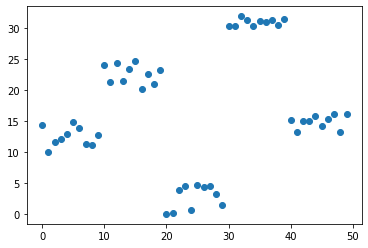

In [ ]:
plt.scatter(x,y)

Обучим кастомный градиентный бустинг и реализацию из sklearn, сравним rmse

In [1]:
#код здесь

Рассмотрим XGBoost

In [ ]:
df = pd.read_csv('csgo_round_snapshots.csv')
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [ ]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81642 entries, 0 to 81641
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     81642 non-null  float64
 1   ct_score                      81642 non-null  float64
 2   t_score                       81642 non-null  float64
 3   map                           81642 non-null  object 
 4   bomb_planted                  81642 non-null  bool   
 5   ct_health                     81642 non-null  float64
 6   t_health                      81642 non-null  float64
 7   ct_armor                      81642 non-null  float64
 8   t_armor                       81642 non-null  float64
 9   ct_money                      81642 non-null  float64
 10  t_money                       81642 non-null  float64
 11  ct_helmets                    81642 non-null  float64
 12  t_helmets                     81642 non-null  float64
 13  c

In [ ]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,81642.000000,81642.000000,81642.000000,81642.000000,81642.000000,81642.000000,81642.000000,81642.000000,81642.000000,81642.000000,...,81641.000000,81641.000000,81641.000000,81641.000000,81641.000000,81641.000000,81641.000000,81641.000000,81641.000000,81641.000000
mean,96.454471,6.840780,6.942701,410.168455,400.608670,314.665895,300.465557,10040.011269,11508.288626,2.074802,...,1.865852,1.873421,1.571380,1.662204,1.020382,0.018459,0.044806,1.368834,0.028160,0.026959
std,54.026175,4.894001,4.846104,133.217763,140.652212,171.288139,174.100149,11502.960357,12474.172591,1.836210,...,1.769636,1.798245,1.738468,1.833331,1.468434,0.138904,0.220576,1.666688,0.171251,0.169215
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.910000,3.000000,3.000000,343.000000,314.000000,194.000000,177.000000,1300.000000,1650.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.900000,6.000000,6.000000,500.000000,500.000000,378.000000,344.000000,5850.000000,7400.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,165.650000,10.000000,10.000000,500.000000,500.000000,487.000000,469.000000,14900.000000,18350.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,5.000000,7.000000,5.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [ ]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

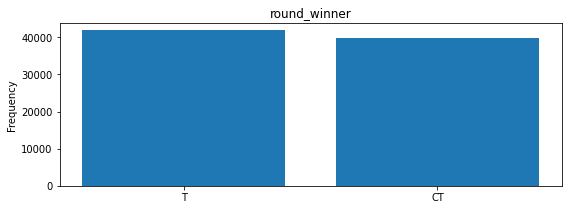

round_winner: 
 T     41837
CT    39804
Name: round_winner, dtype: int64


In [ ]:
bar_plot('round_winner')

Главное о данных для XGBoost:

    Numeric features should be scaled
    Categorical features should be encoded

In [ ]:
df['round_winner'] = df['round_winner'].apply(lambda x: 1 if x == 'CT' else 0)
y = df['round_winner']
X = df.drop(['round_winner'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
#обучим xgboost

In [3]:
#подбор гиперпараметров xgboost